# Introduction

This notebook runs the Stable Diffusion v1.4 model using HuggingFace `diffusers` library on the **CPU**. This model is based on the [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4) implementation. 

You just need to provide the Auth Token once for which you need a HuggingFace account.

The following few block cover the first time package installations and also the authentication process.

## Required Fist Time Installations

In [1]:
# !pip install diffusers transformers huggingface-hub

In [2]:
import logging
import matplotlib.pyplot as plt
import torch

from pathlib import Path
from diffusers import StableDiffusionPipeline
from huggingface_hub import notebook_login

torch.manual_seed(1)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


## Required First Time Authentication

Executing the following block the first time will show the following prompt.

![](images/huggingface-notebook-login.png)

You need to provide an authentication token once. You can find the token in by accessing your Hugginface account settings.

**`Click on the User Logo => Settings > Access Tokens`**

In case you don't have an access token, you can generate one and copy/past in the `Token` input box.

![](images/huggingface-user-access-token.png)

In [3]:
# The Auth Token Login process is needed only once when running on 
# local system.
if not (Path.home()/'.huggingface'/'token').exists(): 
    notebook_login()

In [4]:
CONFIGS = {
    'h': 512, # Defaut height for Stbale Diffsion v-1.4.
    'w': 512, # Defaut width for Stbale Diffsion v-1.4.
    'seed': 42 # TORCH manual seed.
}

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    use_auth_token=True,
)

del pipe.vae.encoder

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [6]:
!ls ~/.cache/huggingface/diffusers/

models--CompVis--stable-diffusion-v1-4


  0%|          | 0/50 [00:00<?, ?it/s]

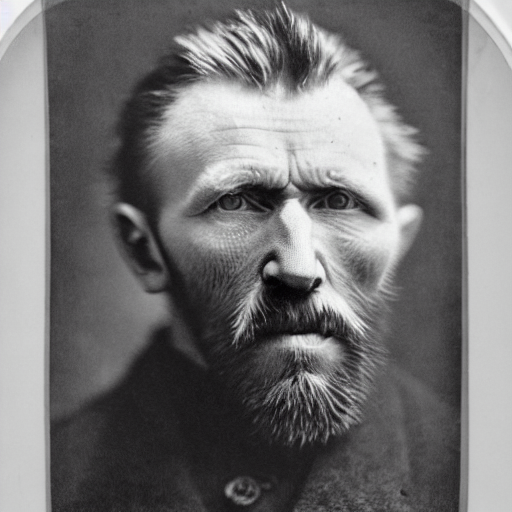

In [7]:
torch.manual_seed(CONFIGS['seed'])
prompt = "a dark, monochrome, glass negative, silver gelatine realistic, supersharp, supersharp, \
          realistic, photographic daguerrotpye portrait of vincent van gogh, shallow depth of field"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

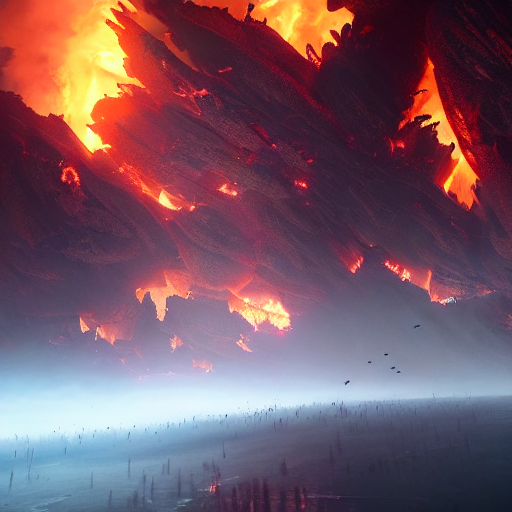

In [8]:
prompt = "A world of fire, atmospheric, hyper realistic, 8k, epic composition, \
          cinematic, octane render, artstation landscape"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

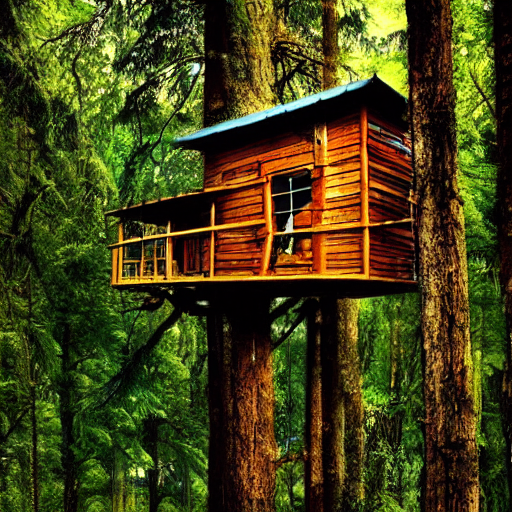

In [9]:
prompt = "tree house in the forest, atmospheric, hyper realistic, epic composition, cinematic, \
          landscape vista photography, 4k"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

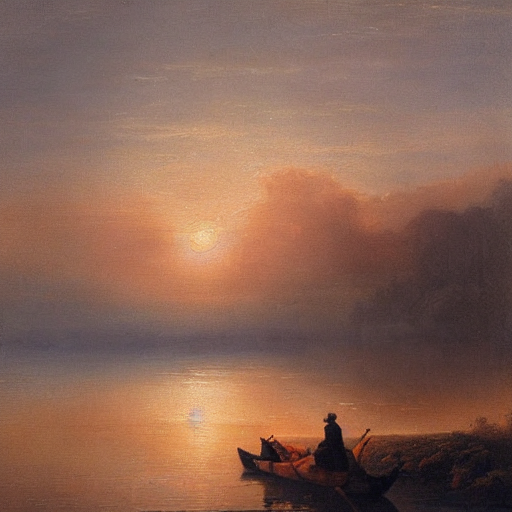

In [10]:
prompt = "a photograph of a prince riding a horse on water during sunset, oil painting \
          foggy atmosphere, cinematic"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]